# Instruction of using the SLR functions

## Extract the text from the pdf file


In [1]:
from extract_txt.pdf2txt import pdf2txt, pdfs2txt

### Extract single PDF file to text

This will generate a new text file under the assigned output_path with same name as the input pdf file.

**Warning:**

- The text does not contain the reference list, as it automatically remove the text after the reference shows up in the PDF. This could cause an issue that it omits the information if the word is show up earlier than the reference list.

- A manual check of the text file is done to ensure the text is correct.

In [2]:
file_path = 'data/sample-data/pdf/'
output_path = 'data/processed-data/txts/'
pdf2txt(file_path, output_path, 'example_wos_49_1999.pdf')

'environment and planning a 1999, volume 31, pages 1935 1947  group based versus individual based conjoint preference  models of residential preferences a comparative test  e molin, h oppewal, h timmermans  department of architecture and urban planning, eindhoven university of technology,  po box 513, postvak 20, 5600 mb eindhoven, the netherlands  e mails e.j.e.molin sepa.tudelft.nl h.oppewal surrey.ac.uk  m.v.kasteren bwk.tue.nl  received 1 december 1997 in revised form 3 august 1998 in re revised form 8 february 1999  abstract. the conjoint preference approach, measuring individual preferences, has a long history  in the study of residential decisionmaking processes. residential choice behaviour, however, is often  the result of a group decisionmaking process. in this paper we investigate whether conjoint preference  models derived from group responses are different from and predict better than conventional con  joint models derived from the responses of individuals who do not inter

### Extract multiple PDF files to text

It is same process for any number of PDFs as the scripts identify from filenames that are ending with ".pdf" instead of specific PDF filenames.

In [3]:
file_path = 'data/sample-data/pdf/'
output_path = 'data/processed-data/txts/'
pdfs2txt(file_path, output_path)

All pdf files have been converted to txt files.


In [2]:
file_path = '/Users/bayili/Desktop/all_PDFs/processed_pdf/'
output_path = '/Users/bayili/Desktop/all_PDFs/processed_txt'
pdfs2txt(file_path, output_path)

All pdf files have been converted to txt files.


## Metadata analysis

The mata data, usually acquired directly from the database. So in this section, it will contain the analysis of the metadata.

In [ ]:
import pandas as pd
import numpy as np

### Basic frequency distribution of number of papers published in each year

In [47]:
# import data final_database.csv
df = pd.read_csv('data/sample-data/year.csv')

df.head()

,Included,Year
0,wos_43,2009
1,wos_23,2014
2,wos_33,2010
3,wos_34,2020
4,wos_35,2018


In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

In [91]:
def plot_freq(data = df, yr_col = 'Year'):

    # Calculate frequency
    frequency = data[yr_col].value_counts()
    # Normalize to get transparency values between 0 and 1
    transparency = frequency / frequency.max()

    # zip in frequency and transparency as a new data frame, and keep the index
    df_freq = pd.DataFrame(zip(frequency, transparency), index=frequency.index, columns=['frequency', 'transparency']).reset_index()

    # sort by year
    df_freq = df_freq.sort_values('Year')

    # make the plot wider
    plt.figure(figsize=(10, 5))

    ax = sns.barplot(x='Year', y='frequency', data=df_freq, color='darkred', order=df_freq['Year'])
    for bar, alpha in zip(ax.containers[0], df_freq['transparency']):
        bar.set_alpha(alpha)
    plt.show()

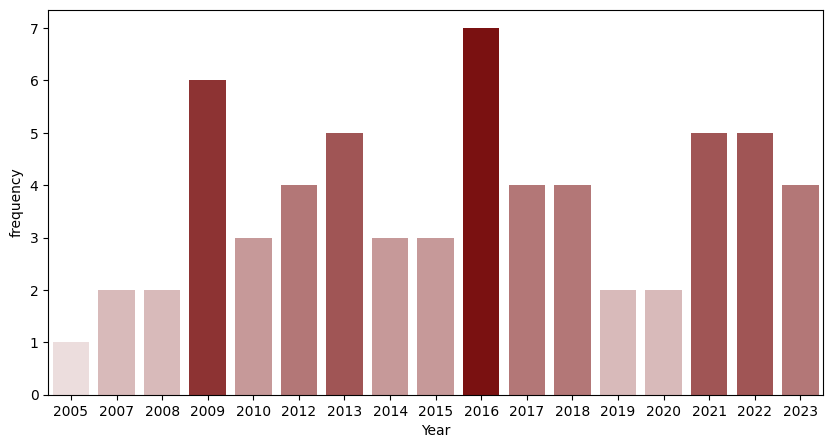

In [92]:
plot_freq(df, 'Year')

In [84]:
print(f'The earliest publication is {df["Year"].min()} and the latest is {df["Year"].max()}, with a total of {df["Year"].nunique()} years.')

# First, we single out the recent 5 years
df_5 = df[df['Year'] >= 2018]

df_pre = df[df['Year'] < 2018]

plot_freq(df_pre, 'Year')

The earliest publication is 2005 and the latest is 2023, with a total of 17 years.


In [107]:
print(f'The total number of publications before 2018 is {df_pre.shape[0]}.')
df_pre['Year'].value_counts().sort_index()  

print('The middle year is 2013, where the number of publication before 2013 is 18, and the number of publication after 2013 is 22.')

The total number of publications before 2018 is 40.
The middle year is 2013, where the number of publication before 2013 is 18, and the number of publication after 2013 is 22.


### Mapping the case study area

The case study area can be extracted from the title and abstract of the paper by using the matching with city database.

It should be aware that it is more useful for empirical studies, as case studies are usually not the main focus of the paper.

But for other topics, the case study area is not always available in the title or abstract.

In the case of reviewing the literature of Agent-based modelling, the case study area is not always available in the title or abstract. So we used the AI (gpt 3.5) to extract the case study area from the full text (private repository https://github.com/BayiLi081/ai-sys-lit-review, open request to test).

In [5]:
import folium

In [13]:
# import data final_database.csv
df = pd.read_csv('data/sample-data/map.csv')

df.head()

,ID,Year,Geographical Area,lat,lng
0,wos_23,2014,"East Anglia, UK",52.649496,1.254216
1,wos_34,2020,"Bangalore, India",13.004496,77.585667
2,wos_35,2018,"Baoding, China",38.878741,115.445203
3,wos_87,2021,"Toronto, Metro Vancouver, and Calgary in Canada",43.675809,-79.391095
4,wos_88,2009,"Buffalo, USA",42.885374,-78.879561


In [6]:
# plot the map with the columns 'lat' and 'lng'
## Generate a map of world
map = folium.Map(location=[0, 0], zoom_start=2)
for index, row in df.iterrows():
    folium.CircleMarker([row['lat'], row['lng']],
                        radius=5,
                        popup=row['Geographical Area'],
                        fill_color="#3db7e4",
                    ).add_to(map)
map

If there is a need to directly compare the number of papers in each case study area, we can use the MarkerClusterGroup to show the number of papers in each case study area.

In [7]:
from folium.plugins import MarkerCluster

In [8]:
map = folium.Map(location=[0, 0], zoom_start=2)

marker_cluster = MarkerCluster().add_to(map)

for index, row in df.iterrows():
    # skip nan values
    if not np.isnan(row['lat']) and not np.isnan(row['lng']):
        folium.CircleMarker([row['lat'], row['lng']],
                            radius=5,
                            popup=row['Geographical Area'],
                            fill_color="#3db7e4",
                        ).add_to(marker_cluster)

folium.LayerControl().add_to(map)

map

Add more information to the popup of each marker

In [17]:
map = folium.Map(location=[0, 0], zoom_start=2)

marker_cluster = MarkerCluster().add_to(map)

for index, row in df.iterrows():
    # skip nan values
    city = row['Geographical Area']
    id = row['ID']
    folium.CircleMarker([row['lat'], row['lng']],
                        radius=5,
                        popup=f'The study area for <b>{id}</b> is <br> <u>{city}</u>',
                        fill_color="#3db7e4",
                    ).add_to(marker_cluster)

folium.LayerControl().add_to(map)

map

Save the map to html file or print it to pdf upon on the need.

In [18]:
# save the map as HTML file
map.save('maps/map.html')

#### Add the scale of case study to the map

In [36]:
# import data final_database.csv
df_new = pd.read_csv('data/sample-data/map_scale.csv')

list_scale = list(df_new['Scale'].unique())

list_scale

['Region', 'City', 'Neighbourhood', 'District']

In [41]:
# create a dict with the scale as key and the color as value
dict_color = {
    'Neighbourhood': '#00008B', # darkblue
    'District': '#8B8000', # darkyellow
    'City': '#301934', # darkpurple
    'Region': '#8B0000', # darkred
}

In [46]:
map = folium.Map(location=[0, 0], zoom_start=2)

marker_cluster = MarkerCluster().add_to(map)

for index, row in df_new.iterrows():
    # skip nan values
    city = row['Geographical Area']
    id = row['ID']
    scale = row['Scale']
    color = dict_color[scale]
    folium.CircleMarker([row['lat'], row['lng']],
                        radius=5,
                        popup=f'The study area for <b>{id}</b> is <br> <u>{city}</u>',
                        color=color,
                        fill_color=color,
                    ).add_to(marker_cluster)
    
# add legend
for scale, color in dict_color.items():
    folium.CircleMarker(
        location=[0, 0],
        radius=5,
        color=color,
        fill_color=color,
        tooltip=scale,
    ).add_to(map)
    

folium.LayerControl().add_to(map)

map

### Keyword transition analysis

From the previous year analysis, we separate the years into three periods:

- 2005-2012 The early stage of the research, containing 18 papers
- 2013-2017 The middle stage of the research, containing 22 papers
- 2018-2021 The recent stage of the research, containing 22 papers

In [136]:
# import data final_database.csv
df = pd.read_csv('data/sample-data/keyword.csv')

Periods = ['Early', 'Middle', 'Recent']

# categories the year into the new column 'Period'
df['Period'] = pd.cut(df['Year'], bins=[1900, 2012, 2017, 2040], labels=Periods)

df.head()

,Included,Year,Keywords,Period
0,wos_43,2009,Residential Segregation;Cellular-Automata;Acti...,Early
1,wos_23,2014,Land-Use;Integrated Assessment;Socioeconomic C...,Middle
2,wos_33,2010,Agent-Based Model;Location Choice;Social Segre...,Early
3,wos_34,2020,Life-Cycle;Neighborhood;Segregation;Simulation...,Recent
4,wos_35,2018,Loss Aversion;Land-Use;Sensitivity-Analysis;Lo...,Recent


In [158]:
kw_periods = dict()
new_list = []
for period in Periods:
    lists_words = df[df['Period'] == period]['Keywords'].tolist()
    # flatten the list of lists
    for list_words in lists_words:
        for word in list_words.split(';'):
            word = word.strip()
            if word not in ['Multi-Agent Systems', 'Multi-Agent System', 'Agent-Based Modelling', 'Agent-Based Model', 'Agent-Based Models', 'Agent-Based Modeling', 'Agent-Based Models', 'Agent Based', 'Model', 'Simulation', 'Agent Based Simulation', 'Urban']:
                new_list.append(word)
    kw_periods[period] = new_list

kw_periods

{'Early': ['Residential Segregation',
  'Cellular-Automata',
  'Action Zones',
  'Racial Segregation',
  'Dynamics',
  'Preferences',
  'Emergence',
  'Sociology',
  'Poverty',
  'Location Choice',
  'Social Segregation',
  'Travel Time',
  'Cliques',
  'Networks',
  'Schelling',
  'Segregation',
  'Theoretical Explorations',
  'Ethnic-Preferences',
  'White Flight',
  'Dynamics',
  'Ethnic-Preferences',
  'Neighborhood',
  'Benefits',
  'Prices',
  'Rise',
  'Neighborhood Racial Segregation',
  'Urban Segregation',
  'Social Mix',
  'Urban Policies',
  'Social Simulation',
  'Brazil',
  'Ethnic-Preferences',
  'Dynamics',
  'Gis',
  'Residential Segregation',
  'Ethnic-Preferences',
  'Theoretical Explorations',
  'Racial Segregation',
  'Gentrification',
  'Cellular Automata',
  'Real Estate Market',
  'Rent Gap',
  'Residential Choice',
  'Schelling',
  'Segregation',
  'Wealth',
  'Status',
  'Location Choice',
  'Urban Land Market',
  'Agent-Based Computational Economics',
  'Land

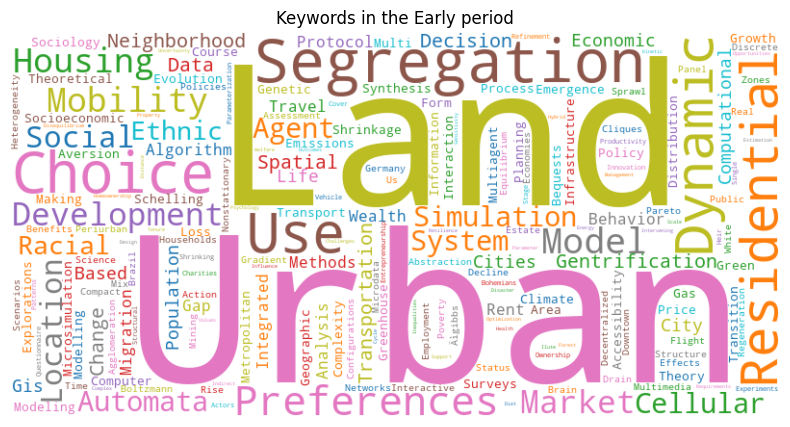

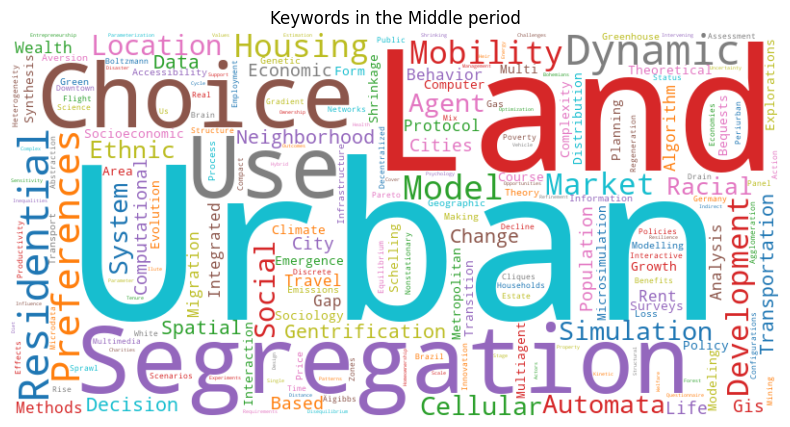

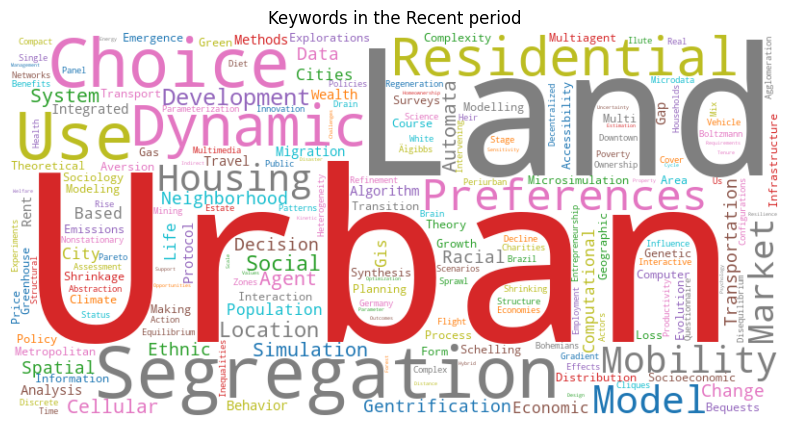

In [159]:
# draw the wordcloud for each period
from wordcloud import WordCloud

for period, list_words in kw_periods.items():
    
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='tab10', collocations=False).generate(' '.join(list_words))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Keywords in the {period} period')
    plt.show()

### Citation Graphs

An existing connected paper tool is used to generate the citation graph. The tool is available at [https://www.connectedpapers.com/](https://www.connectedpapers.com/). The citation graph is generated by the tool and the graph is saved as a JSON file. The JSON file is then used to generate the citation graph.

However, the citation graph is generated with a seed paper. It is not quite aimed to build the citation graph on an existing literature database.

The following texts is from reference [1] to explain the citation graph and its usages:

> Citation graphs in the context of systematic reviews should provide an insight into the relationships between the publications included in the review. 

> The arrangement of the publications should be based on their respective year of publication. This means that all publications which appeared in the same year are arranged next to each other, making additional information visible. 

> For illustration purposes, a timeline is printed below the graph itself, so that it is possible to see exactly which publication appeared in which year. In addition, it can be quickly determined in which period of time the included research work is conducted and from which years more or less work originates.

> The basis for the citation graph is therefore primarily the timeline. It covers the period of all publication years of the included works. Based on the timeline, the works are then drawn as nodes at the respective position on the timeline and the works linked by quotations are connected to each other with edges. Furthermore, different components within the graph should be visibly separated from each other. From a graph-theoretical point of view, it is possible that the citation graph is not only represented by a single directed graph, but consists of several independent subgraphs. In the context of this work, however, it is useful to consider the citation graph always as a single unit and thus as **a graph with several components**. 

> Here, **a component is defined as a subset of nodes and edges** in which each node has at least one incoming or outgoing edge to another node of this subset. In addition, each node that has no edges is also its own component. To make the independence of the components visible, they should be drawn one below the other.

#### Summarised Citation Graph after Node Summaries

There are various approaches to summarizing graphs, but they are not necessarily applicable to such relatively small graphs like our citation graphs. A merging of several nodes to a supernode with superedges is a well realizable possibility. Several nodes with the same or very similar incoming and outgoing edges are merged into one large node. In order to minimize errors and to reconstruct the original graph exactly, the merge consists not only of the graph itself, but also of a list of corrections of the edges.

This method can quickly become very inefficient for large graphs, since numerous comparisons of the nodes with each other must be processed to find those with similar edges. In [15] such an algorithm is presented, where first similar nodes are searched for to avoid unnecessary comparisons between all nodes. Then a summary of the graph is iteratively generated by merging original nodes or already existing supernodes.

In case of the citation graphs, only merges of nodes in the same level, i.e. publications with the same publication year, are reasonable. Because of this, supernodes with a large number of merges are extremely unlikely, so it makes more sense to focus on good merges of two or three nodes each. For this purpose, all possible candidates for the merging of two nodes are found first. Using a weight based on common and different edges for each pair of candidates, the best possible candidates are then selected. Based on these results, the calculation of connection components with three nodes from the candidate pairs is performed to determine good merges of three nodes.

We present the above described example in Fig. 2b as a summary after merging nodes: A total of 5 nodes and 37 edges are removed.

## References

[1] Sven Groppe, Lina Hartung, ReViz: A Tool for Automatically Generating Citation Graphs and Variants, International Conference on Asian Digital Libraries (ICADL): Digital Libraries at Times of Massive Societal Transition, online, https://doi.org/10.1007/978-3-030-64452-9_10